# <font color='blue'> Análise de Componentes Principais</font>

### Material produzido por Luis Gustavo Nonato

---
ICMC-USP

## Conteúdo
- Mudança de Base
- Conceitos Fundamentais 
  - Covariância
  - Matriz de Covariância
- Componentes Principais
  - Propriedades
- Cálculo das Componentes Principais

----

Bibliograpia:
- [A Tutorial on Principal Components Analysis,  Jonathon Shlens](https://arxiv.org/pdf/1404.1100.pdf)
- [Principal Component Analysis,
H. Abdi, L.J. Williams](https://wwwpub.utdallas.edu/~herve/abdi-wireCS-PCA2010-inpress.pdf)

## <font color='blue'> Mudança de base </font>

Suponha $\mathbf{x}=a_1\mathbf{v}_1+\ldots+a_k\mathbf{v}_k$, onde $V=\{\mathbf{v}_1,\ldots,\mathbf{v}_k\}$ é uma base para o espaço $\mathbb{R}^k$ e $a_1,\ldots,a_k$ as coordenadas de $\mathbf{x}$ na base $V$, que denotamos como:

$$
[\mathbf{x}]_V=\begin{bmatrix} a_1 \\ \vdots \\ a_k \end{bmatrix}
$$

Considere uma outra base $W=\{\mathbf{w}_1,\ldots,\mathbf{w}_k\}$ para $\mathbb{R}^k$ tal que $\mathbf{x}=c_1\mathbf{w}_1+\ldots+c_k\mathbf{w}_k$, ou seja,

$$
[\mathbf{x}]_W=\begin{bmatrix} c_1 \\ \vdots \\ c_k \end{bmatrix}
$$

Temos que os vetores $\mathbf{w}_i$ podem ser escritos na base $V$, ou seja,

$$
\mathbf{w}_i = b_{1i}\mathbf{v}_1+\cdots+b_{ki}\mathbf{v}_k\\
\Downarrow\\
\begin{bmatrix}
| & & | \\
\mathbf{w}_1 & \cdots & \mathbf{w}_k\\
| & & | 
\end{bmatrix}=
\begin{bmatrix}
| & & | \\
\mathbf{v}_1 & \cdots & \mathbf{v}_k\\
| & & | 
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{ik} \\
 & \vdots & \\
b_{k1} & \cdots & b_{kk} 
\end{bmatrix}
$$

Portanto:

$$
\mathbf{x} = 
\begin{bmatrix}
| & & | \\
\mathbf{w}_1 & \cdots & \mathbf{w}_k\\
| & & | 
\end{bmatrix}
[\mathbf{x}]_W=
\begin{bmatrix}
| & & | \\
\mathbf{w}_1 & \cdots & \mathbf{w}_k\\
| & & | 
\end{bmatrix}
\begin{bmatrix}
c_1 \\ \vdots \\ c_k
\end{bmatrix}=
\begin{bmatrix}
| & & | \\
\mathbf{v}_1 & \cdots & \mathbf{v}_k\\
| & & | 
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{ik} \\
 & \vdots & \\
b_{k1} & \cdots & b_{kk} 
\end{bmatrix}
\begin{bmatrix}
c_1 \\ \vdots \\ c_k
\end{bmatrix}
$$

Sabemos que a representação de um vetor em uma dada base é única, logo temos que:

$$
\underbrace{\begin{bmatrix}
b_{11} & \cdots & b_{ik} \\
 & \vdots & \\
b_{k1} & \cdots & b_{kk} 
\end{bmatrix}}_{\mathbf{B}}
\begin{bmatrix}
c_1 \\ \vdots \\ c_k
\end{bmatrix}=
\begin{bmatrix}
a_1 \\ \vdots \\ a_k
\end{bmatrix}
$$

Em outras palavras, 

$$
[\mathbf{x}]_V = \mathbf{B}[\mathbf{x}]_W
$$

A matriz $\mathbf{B}$ é chamada de matriz de mudança de base (da  base $W$ para base $V$).

## <font color='blue'> Conceitos Fundamentais </font>

### Covariância
Considere duas sequências de valores $\mathbf{x}=\{x_1,x_2,\ldots,x_k\}$ e $\mathbf{y}=\{y_1,y_2,\ldots,y_k\}$. 

A covariância entre $\mathbf{x}$ e $\mathbf{y}$ é definida como:
$$
cov(\mathbf{x},\mathbf{y}) = \frac{1}{n-1}\sum_i (x_i-\mu_x)(y_i-\mu_y)
$$
onde $\mu_x=\frac{1}{n}\sum_i x_i$ e $\mu_y=\frac{1}{n}\sum_i y_i$ são a média dos valores de $\mathbf{x}$ e $\mathbf{y}$, respectivamente.

Os valores $cov(\mathbf{x},\mathbf{x}) = \frac{1}{n-1}\sum_i (x_i-\mu_x)^2$ é a variância de $\mathbf{x}$.

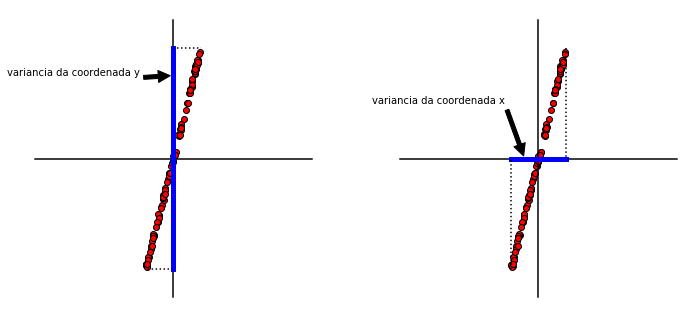

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n=100
X = np.zeros((2,n))
X[0,:] = np.random.uniform(-1,1,size=(1,n))
X[1,:] = 4*X[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.set_aspect('equal')
ax1.axis('off')
ax1.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax1.plot([0,0],[-5,5],color='black');
ax1.plot([-5,5],[0,0],color='black');
ax1.plot([0,0],[-4,4],color='blue',linewidth=5);
ax1.plot([0,1],[4,4],':k');
ax1.plot([0,-1],[-4,-4],':k');
ax1.annotate('variancia da coordenada y', xy=(-0.05, 3), xytext=(-6, 3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

ax2.set_aspect('equal')
ax2.axis('off')
ax2.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax2.plot([0,0],[-5,5],color='black');
ax2.plot([-5,5],[0,0],color='black');
ax2.plot([-1,1],[0,0],color='blue',linewidth=5);
ax2.plot([1,1],[4,0],':k');
ax2.plot([-1,-1],[-4,0],':k');
ax2.annotate('variancia da coordenada x', xy=(-0.5, 0), xytext=(-6, 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

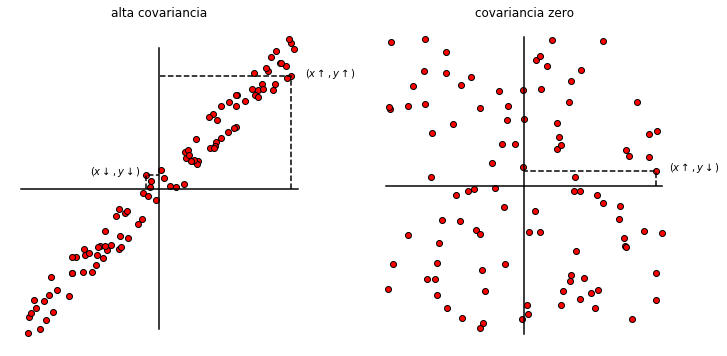

In [2]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
Xc[0,0] = 0.95
Xc[1,0] = 0.8
Xc[0,1] = -0.1
Xc[1,1] = 0.1

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');
ax1.set_title('alta covariancia');
ax1.text(Xc[0,0]+0.1, Xc[1,0], r'$(x\uparrow,y\uparrow)$');
ax1.plot([Xc[0,0],Xc[0,0],0],[0,Xc[1,0],Xc[1,0]],'--k');
ax1.text(Xc[0,1]-0.4, Xc[1,1], r'$(x\downarrow,y\downarrow)$');
ax1.plot([Xc[0,1],Xc[0,1],0],[0,Xc[1,1],Xc[1,1]],'--k');

#### figura da direita
Xnc = np.zeros((2,n))
Xnc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[1,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[0,0] = 0.95
Xnc[1,0] = 0.1

ax2.axis('off')
ax2.scatter(Xnc[0,:],Xnc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax2.plot([0,0],[-1,1],color='black');
ax2.plot([-1,1],[0,0],color='black');
ax2.set_title('covariancia zero');
ax2.text(Xnc[0,0]+0.1, Xnc[1,0], r'$(x\uparrow,y\downarrow)$');
ax2.plot([Xnc[0,0],Xnc[0,0],0],[0,Xnc[1,0],Xnc[1,0]],'--k');

### Matriz de Covariância

Considere $\mathbf{X}=\{\mathbf{x}_1,\ldots,\mathbf{x}_n\} $ um conjunto de pontos em  $\mathbb{R}^d$. 

Pode-se organizar os pontos como colunas de uma matriz $\mathbf{X}$ (matriz de dados) com dimensões $d\times n$:

$$
   \mathbf{X}=
    \begin{bmatrix}
      |&|&&|\\
      \mathbf{x}_1&\mathbf{x}_2&\dots&\mathbf{x}_n\\
      |&|&&|
    \end{bmatrix}=
    \begin{bmatrix}
      x_{11}                & {x_{12}} &\dots  & x_{1n}\\
      {x_{21}} & x_{22}               &\dots  & {x_{2n}}\\
      \vdots               &\vdots               &\ddots &\vdots\\
      x_{d1}                & {x_{d2}}&\dots  & x_{dn}
    \end{bmatrix}
$$

Denotando as linhas da matriz $\mathbf{X}$ por ${x}_{1:},\ldots,{x}_{d:}$ define-se
a matriz de covariância de $\mathbf{X}$ por:

$$
cov(\mathbf{X})=
\begin{bmatrix}
      {cov(x_{1:},x_{1:})} & cov(x_{1:},x_{2:})          & \dots  &cov(x_{1:},x_{d:})\\
      cov(x_{2:},x_{1:})          & {cov(x_{2:},x_{2:})} & \dots  &cov(x_{2:},x_{d:})\\
      \vdots                      &      \vdots                 &\ddots  &\vdots\\
      cov(x_{d:},x_{1:})          &cov(x_{d:},x_{2:})           &\dots   &{cov(x_{d:},x_{d:})}
\end{bmatrix}
$$

**Importante**: Os elementos na diagonal da matriz correspondem à variância de cada coordenada dos vetores coluna de $\mathbf{X}$.

**Propriedades**:
1. Cada entrada da matrix $cov(\mathbf{X})$ corresponde a covariância entre duas coordenadas dos vetores coluna 
2. $cov(\mathbf{X})$ é uma matriz simétrica
3. $cov(\mathbf{X})$ é semi-definida positiva 

---
**Prova da propriedade 3**: $cov(\mathbf{X})$ é semi definida positiva

O segredo da prova é enxergar que:
$$
cov(\mathbf{X})=\frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top
$$
onde $\mu=\frac{1}{n}\sum_i \mathbf{x}_{i}$

Assim,
$$
\mathbf{u}^\top cov(\mathbf{X})\mathbf{u}\\
=\mathbf{u}^\top\left( \frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \right)\mathbf{u}\\
=  \frac{1}{n}\sum_i \mathbf{u}^\top(\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \mathbf{u}\\
=\frac{1}{n}\sum_i \left((\mathbf{x}_{i}-\mu)^\top \mathbf{u}\right)^2\geq 0
$$

---

Assumindo que os dados estão centralizados, isto é, $\mu=0$, a matriz de covariância pode ser calculada como:

$$
cov(\mathbf{X})=\frac{1}{n}\mathbf{X}\mathbf{X}^\top
$$

[[3.19 2.69 4.27 5.   6.45 4.74 6.51 9.62 3.26 4.76]
 [3.15 2.28 6.9  7.15 7.13 6.61 4.6  9.79 4.99 1.91]
 [6.37 1.82 6.16 4.68 7.76 1.52 3.52 9.21 5.44 6.46]
 [3.71 2.71 2.91 3.15 4.52 9.36 8.56 3.25 1.39 4.66]
 [9.83 3.55 9.13 9.19 1.02 1.06 9.91 6.71 9.58 1.57]
 [1.08 2.54 5.06 7.21 3.   9.8  8.86 2.19 3.19 4.58]
 [1.51 8.92 7.94 3.03 1.43 1.25 7.85 5.15 1.5  9.62]
 [7.29 1.29 6.24 7.32 9.15 2.48 1.3  2.64 1.9  4.09]
 [4.98 8.54 2.32 2.45 8.6  6.81 5.93 2.12 4.86 3.64]
 [2.24 1.97 4.44 1.39 6.76 9.37 6.42 7.74 5.95 4.91]]
[5.05 5.45 5.29 4.42 6.16 4.75 4.82 4.37 5.03 5.12]
[[-1.86 -2.36 -0.78 -0.04  1.4  -0.31  1.46  4.57 -1.79 -0.28]
 [-2.3  -3.17  1.45  1.7   1.68  1.16 -0.85  4.34 -0.46 -3.54]
 [ 1.08 -3.47  0.86 -0.62  2.46 -3.77 -1.78  3.92  0.15  1.17]
 [-0.71 -1.71 -1.52 -1.28  0.1   4.93  4.14 -1.17 -3.03  0.24]
 [ 3.67 -2.6   2.98  3.03 -5.13 -5.09  3.76  0.55  3.42 -4.59]
 [-3.67 -2.21  0.31  2.46 -1.75  5.05  4.11 -2.56 -1.56 -0.17]
 [-3.31  4.09  3.12 -1.79 -3.39 -3.57  

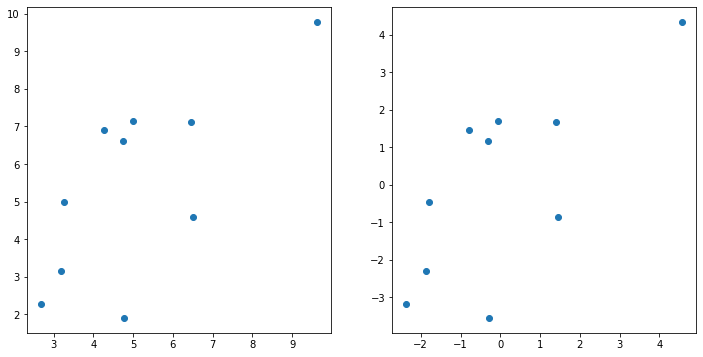

In [11]:
np.set_printoptions(precision=2)
X = np.random.uniform(1,10,size=(10,10))
print(X)
print(np.mean(X,axis=1))

Xcentralizado = X - np.mean(X,axis=1).reshape(-1,1)

print(Xcentralizado)
print(np.mean(Xcentralizado,axis=1))

fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(X[0,:],X[1,:])
ax2.scatter(Xcentralizado[0,:],Xcentralizado[1,:])

## <font color='blue'>Análise de Componentes Principais (Principal Component Analysis - PCA) </font>

A idéia do método de _Análise de Componentes Principais_ é encontrar uma nova base para representar os dados de modo que a covariância entre coordenadas distintas nesta nova base seja zero.


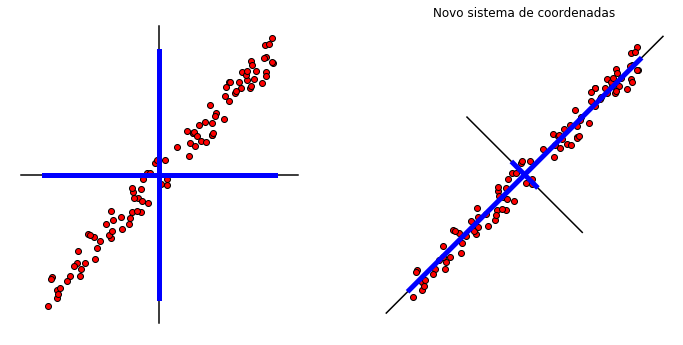

In [12]:
# import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax1.plot([0,0],[-1.2,1.2],color='black');
ax1.plot([0,0],[-1.0,1.0],color='blue',linewidth=5);
ax1.plot([-1.2,1.2],[0,0],color='black');
ax1.plot([-1,1],[0,0],color='blue',linewidth=5);

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_title('Novo sistema de coordenadas');
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax2.plot([-1.2,1.2],[-1.2,1.2],color='black');
ax2.plot([-1.0,1.0],[-1.0,1.0],color='blue',linewidth=5);
ax2.plot([-0.5,0.5],[0.5,-0.5],color='black');
ax2.plot([-0.1,0.1],[0.1,-0.1],color='blue',linewidth=5);

In [13]:
import numpy as np

Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

X=np.dot(Xc,Xc.T)
print(X)

[[30.3  30.63]
 [30.63 31.71]]


Em termos matemáticos, buscamos uma matriz de mudança de base $\mathbf{P}$ tal que

$$
\mathbf{Y}=\mathbf{P}\mathbf{X} \Longrightarrow \mathbf{Y}\mathbf{Y}^\top = \mathbf{D}
$$

onde $\mathbf{D}$ é uma matriz diagonal onde os elementos da diagonal correspondem às variâncias das coordenadas.

Uma vez que $\mathbf{P}$ tenha sido calculada as coordenadas dos pontos na nova base serão "descorrelacionadas".

- algumas das coordenadas terão variância próximo de zero (coordenadas relacionada com ruído nos dados)
- a dimensão dos dados poderá ser reduzida sem grandes perdas de informação

**Calculando a mudança de base**

$$
\mathbf{Y}=\mathbf{P}\mathbf{X} 
$$

$$
\mathbf{Y}\mathbf{Y}^\top=(\mathbf{PX})(\mathbf{PX})^\top=\mathbf{P}\mathbf{X}\mathbf{X}^\top\mathbf{P}^\top
$$

---
**Teorema Espectral:** (relembrando)

Se $\mathbf{A}$ é uma matriz simétrica, então:
$$
\mathbf{A}=\mathbf{UDU}^\top \rightarrow \mathbf{U}^\top\mathbf{AU}=\mathbf{D}
$$
onde $\mathbf{U}$ é matriz ortogonal contendo os autovetores de $\mathbf{A}$ e $\mathbf{D}$ é matriz diagonal contendo os autovalores reais de $\mathbf{A}$</font>

---

$\mathbf{XX}^\top$ é uma matriz simétrica semi-definida positiva. Logo, os autovalores $\lambda _i$ são reais e não negativos. Armazenando os autovetores de $\mathbf{XX}^\top$ em uma matriz  $\mathbf{U}$ e fazendo:

$$\mathbf{P}=\mathbf{U}^\top$$

$$\mathbf{YY}^\top=\mathbf{U}^\top\mathbf{X}\mathbf{X}^\top\mathbf{U} = \mathbf{D}$$

$$
\mathbf{D}=
\begin{bmatrix}
cov(y_{1:},y_{1:}) & 0 & \ldots & 0 \\
0 & cov(y_{2:},y_{2:}) & \ldots & 0 \\
  &            & \vdots & \\
0 & 0 & \ldots & cov(y_{d:},y_{d:}) \\
\end{bmatrix}
$$

**Importante**: $cov(y_{i:},y_{i:}) = \lambda_i$, ou seja, os **autovalores** de $\mathbf{XX}^\top$ **correspondem às variâncias** das coordenadas na nova base. Os **autovetores** de $\mathbf{XX}^\top$ são os elementos da **nova base**, sendo que coordenadas distintas dos dados nesta nova base são "descorrelacionadas".

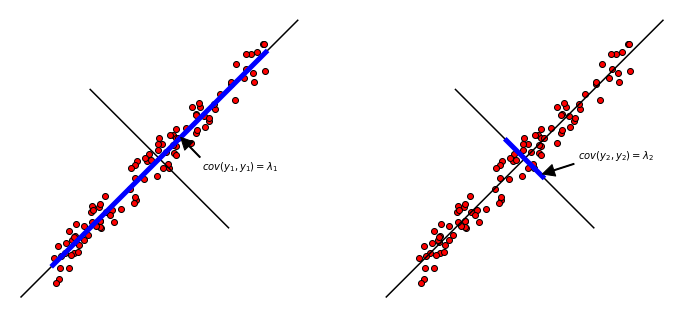

In [33]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.2,0.2,size=(1,n))

#### figura da direita
ax1.axis('off')
ax1.set_aspect('equal')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax1.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax1.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax1.plot([-1,1],[-1,1],color='blue',linewidth=5);
ax1.annotate(r'$cov(y_1,y_1)=\lambda_1$', xy=(0.2, 0.2), xytext=(0.4, -0.1),
              arrowprops=dict(facecolor='black', shrink=0.00,width=1),
              );

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax2.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax2.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax2.plot([-0.17,0.17],[0.17,-0.17],color='blue',linewidth=5);
ax2.annotate(r'$cov(y_2,y_2)=\lambda_2$', xy=(0.15, -0.15), xytext=(0.5, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             );

As coordenas dos pontos no novo sistema de coordenadas são dados por:
$$
\mathbf{y_i}=\mathbf{U}^\top\mathbf{x_i}
$$

Assumindo que os autovalores estão ordenados $\lambda_1\geq\cdots\geq\lambda_d$, o _Quociente de Rayleigh_ garante que:

$$
\mathbf{u}_1^\top\mathbf{XX}^\top\mathbf{u}_1=\lambda_1 \rightarrow \mathbf{u}_1 \mbox{ (direção de maior variância)}\\
\mathbf{u}_d^\top\mathbf{XX}^\top\mathbf{u}_d=\lambda_d \rightarrow \mathbf{u}_d \mbox{ (direção de menor variância)}
$$

Uma informação muito útil é calcular a porcentagem da informação que pode ser explicada por cada direção (razão de variância explicada). Tal porcentagem é dada por:

$$
\tilde{\lambda}_i = \frac{\lambda_i}{\sum_j \lambda_j}
$$

Em muitos casos, pode-se desprezar as direções (coordenadas) de menor variância, uma vez que estas tipicamente correspondem a ruído nos dados

$$
\hat{\mathbf{Y}}=
\begin{bmatrix}
y_{11} & y_{21} & \cdots & y_{n1} \\
       &        & \vdots & \\
y_{1k} & y_{2k} & \cdots & y_{nk} \\
0 & 0 & \cdots & 0 \\
       &        & \vdots & \\
0 & 0 & \cdots & 0 \\
\end{bmatrix}
$$

pode-se reconstuir os dados "sem ruído" na base original fazendo:

$$
\hat{\mathbf{X}}=\mathbf{U}\hat{\mathbf{Y}}
$$

Consideranto apenas as $k$ primeiras coordenadas de cada ponto, temos uma representação dos dados em um espaço com $k<n$ dimensões. Ou seja, PCA pode ser utilizado como um método de **redução de dimensionalidade**. 

______

# <font color=blue>Calculando PCA </font>

### Exemplo simples

Considere os dados gerados de forma a garantir uma "correlação" entre as coordenadas.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = np.random.uniform(-1,1,size=(2,200))  # os dados já estão centralizados
X[1,:] = X[0,:] + np.random.uniform(-0.3,0.3,200)

XXt = np.dot(X,X.T)

L,U = np.linalg.eigh(XXt)
# o método eigh retorna os autovalores (e autovetores correspondentes) em ordem crescente
# portanto vamos inverter a ordem dos vetores

L = np.flip(L)
U = np.flip(U,axis=1)

[0.93 0.07]


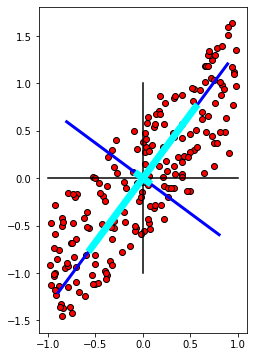

In [16]:
fig, ax = plt.subplots(1,1)
# gerando eixos de R^2
ax.plot([-1,1],[0,0],color='k')
ax.plot([0,0],[-1,1],color='k')
ax.set_aspect('equal')

# plotando os pontos
ax.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth='1')

# plotando as direções principais
ax.plot([-1.5*U[0,0],1.5*U[0,0]], [-1.5*U[1,0],1.5*U[1,0]],color='blue',linewidth=3)
ax.plot([-1*U[0,1],1*U[0,1]], [-1*U[1,1],1*U[1,1]],color='blue',linewidth=3)

L_ratio = L/np.sum(L)
print(L_ratio)
ax.plot([-L_ratio[0]*U[0,0],L_ratio[0]*U[0,0]], \
         [-L_ratio[0]*U[1,0],L_ratio[0]*U[1,0]],color='cyan',linewidth=7)

ax.plot([-L_ratio[1]*U[0,1],L_ratio[1]*U[0,1]], \
         [-L_ratio[1]*U[1,1],L_ratio[1]*U[1,1]],color='cyan',linewidth=7)

Podemos encontrar as coordenadas dos pontos no novo sistema de coordenadas fazendo $Y=U^\top X$

In [17]:
Y = np.dot(U.T,X)
np.set_printoptions(precision=2)
print(Y[:,:10])

[[ 0.23  0.44 -0.77  0.34  1.57 -0.4  -0.3   0.87 -1.44  0.11]
 [ 0.15 -0.21  0.57  0.13  0.19  0.23  0.43 -0.13  0.03 -0.33]]


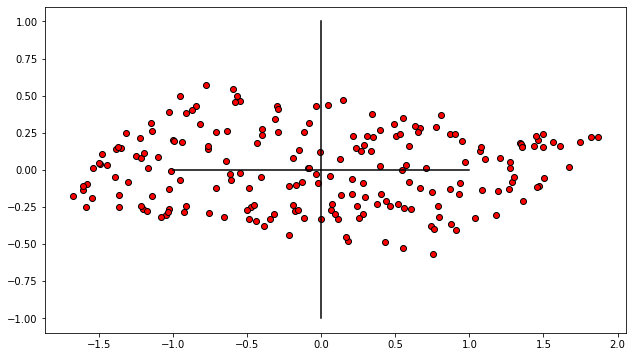

In [18]:
# plotanto os pontos no novo sistema de coordenadas

fig, ax = plt.subplots(1,1)
# gerando eixos de R^2
ax.plot([-1,1],[0,0],color='k')
ax.plot([0,0],[-1,1],color='k')
ax.set_aspect('equal')

# plotando os pontos
ax.scatter(Y[0,:],Y[1,:],marker='o',color='red',edgecolor='black', linewidth='1');

Podemos remover o ruído dos dados e reconstruí-lo no espaço original fazendo $U\hat{Y}=\hat{X}$

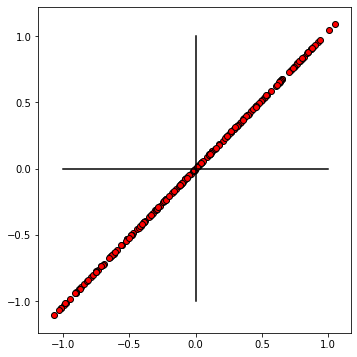

In [48]:
# Gerando Y_hat zerando a segunda coordenada associada à direção de menor variância.

Yh = Y.copy()
Yh[1,:] = 0

Xh = np.dot(U,Yh)

fig, ax = plt.subplots(1,1)
# gerando eixos de R^2
ax.plot([-1,1],[0,0],color='k')
ax.plot([0,0],[-1,1],color='k')
ax.set_aspect('equal')

# plotando os pontos
ax.scatter(Xh[0,:],Xh[1,:],marker='o',color='red',edgecolor='black', linewidth='1')

### Exemplo com dados reais

In [1]:
# esta célula só é necessaria se o notebook estiver rodando no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
###########
# importing the packages
###########
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
###########
# reading data_frame
###########

file = '../DataSets/isolet1234.csv'

df = pd.read_csv(file)
print(df.shape)

(6238, 618)


In [22]:
###########
# printing 5 rows of the DataFrame
###########

print(df.head())

       c0      c1      c2      c3      c4      c5      c6      c7      c8  \
0 -0.4394 -0.0930  0.1718  0.4620  0.6226  0.4704  0.3578  0.0478 -0.1184   
1 -0.4348 -0.1198  0.2474  0.4036  0.5026  0.6328  0.4948  0.0338 -0.0520   
2 -0.2330  0.2124  0.5014  0.5222 -0.3422 -0.5840 -0.7168 -0.6342 -0.8614   
3 -0.3808 -0.0096  0.2602  0.2554 -0.4290 -0.6746 -0.6868 -0.6650 -0.8410   
4 -0.3412  0.0946  0.6082  0.6216 -0.1622 -0.3784 -0.4324 -0.4358 -0.4966   

       c9  ...    c608    c609    c610    c611    c612    c613    c614  \
0 -0.2310  ...  0.4102  0.2052  0.3846  0.3590  0.5898  0.3334  0.6410   
1 -0.1302  ...  0.0000  0.2954  0.2046  0.4772  0.0454  0.2046  0.4318   
2 -0.8318  ... -0.1112 -0.0476 -0.1746  0.0318 -0.0476  0.1112  0.2540   
3 -0.9614  ... -0.0504 -0.0360 -0.1224  0.1366  0.2950  0.0792 -0.0072   
4 -0.5406  ...  0.1562  0.3124  0.2500 -0.0938  0.1562  0.3124  0.3124   

     c615    c616  c617  
0  0.5898 -0.4872   1.0  
1  0.4546 -0.0910   1.0  
2  0.1588 -0.4

In [23]:
###########
# converting data columns to numpy array
###########

data = df.values
print(type(data),type(df))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


[59.87 26.61  9.82  7.02  5.25  4.6   3.34  3.18  2.56  2.24]
[0.35 0.16 0.06 0.04 0.03 0.03 0.02 0.02 0.01 0.01]


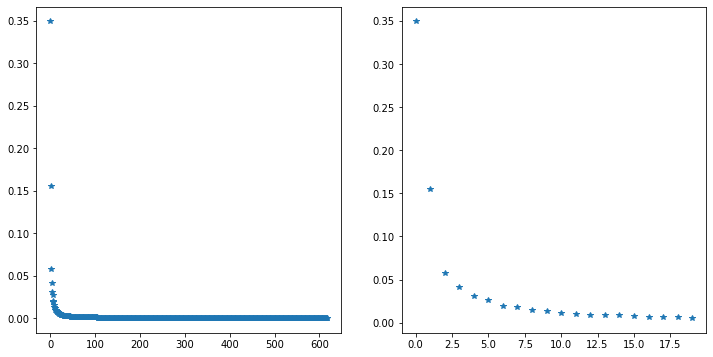

In [24]:
#############
# amount of explained variance
#############
data_pca=PCA(svd_solver='full')
data_transformed = data_pca.fit(data)

print(data_transformed.explained_variance_[:10])
print(data_transformed.explained_variance_ratio_[:10])

#print(data_transformed.explained_variance_)
#print('\n ',data_transformed.explained_variance_ratio_)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

# explained_variance_ratio_[i] = autovalor_i / sum_i(autovalor_i)

ax1.plot(data_pca.explained_variance_ratio_, '*')
ax2.plot(data_pca.explained_variance_ratio_[:20], '*')

(2, 6238)


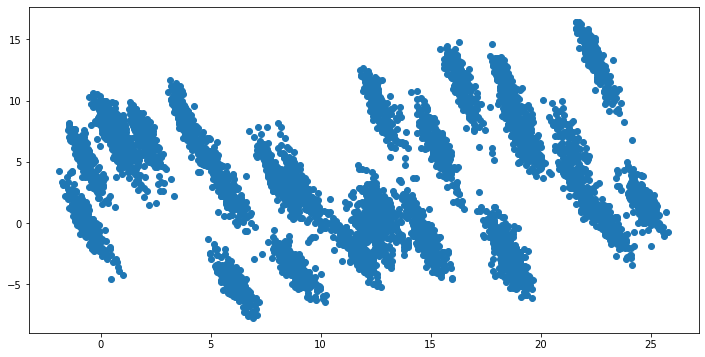

In [25]:
Y2D = np.dot(data_transformed.components_[:2,:],data.T) 
print(Y2D.shape)

plt.scatter(Y2D[0,:],Y2D[1,:])

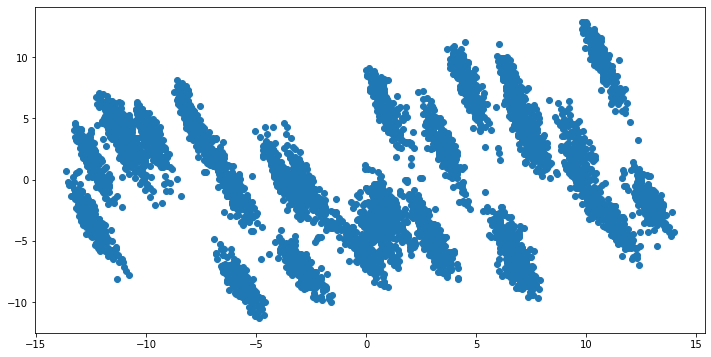

In [17]:
###########
# projecting data in 2D
###########

pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(data)

plt.scatter(data_2d[:,0],data_2d[:,1])

In [21]:
print(np.sum(data_transformed.explained_variance_ratio_[:20]))

0.8060939806148586
